In [1]:
## book clustering, doc2vec
import numpy as np
import pandas as pd

In [44]:
filenames = [
    'data/british-fiction-corpus/Austen_Emma.txt', 
    'data/british-fiction-corpus/Austen_Pride.txt',
    'data/british-fiction-corpus/Austen_Sense.txt',
    
    'data/british-fiction-corpus/CBronte_Jane.txt',
    'data/british-fiction-corpus/CBronte_Professor.txt',
    'data/british-fiction-corpus/CBronte_Villette.txt',
    
    'data/british-fiction-corpus/Dickens_Bleak.txt',
    'data/british-fiction-corpus/Dickens_David.txt', 
    'data/british-fiction-corpus/Dickens_Hard.txt',
    
    'data/british-fiction-corpus/Eliot_Adam.txt',
    'data/british-fiction-corpus/Eliot_Middlemarch.txt',
    'data/british-fiction-corpus/Eliot_Mill.txt',
    
    'data/british-fiction-corpus/Thackeray_Barry.txt',
    'data/british-fiction-corpus/Thackeray_Pendennis.txt',
    'data/british-fiction-corpus/Thackeray_Vanity.txt']

booknames = ['Austen_Emma', 'Austen_Pride', 'Austen_Sense',
            'CBronte_Jane', 'CBronte_Professor', 'CBronte_Villette',
            'Dickens_Bleak', 'Dickens_David', 'Dickens_Hard',
            'Eliot_Adam', 'Eliot_Middlemarch', 'Eliot_Mill',
            'Thackeray_Barry', 'Thackeray_Pendennis', 'Thackeray_Vanity']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input='filename') # fit_transform expects a list of file names

# document term matrix 
dtm = vectorizer.fit_transform(filenames) 
print(type(dtm))

# vocabulary list 
vocab = vectorizer.get_feature_names() # change to a list
dtm = dtm.toarray() # convert to a regular array
print(vocab[300:305])

<class 'scipy.sparse.csr.csr_matrix'>
['_feelings_', '_felt_', '_ferarum_', '_fete_', '_fiacre_']


In [37]:
# count the word "house" in Emma (file 0 in the list of files)
house_idx = list(vocab).index('house') #index of "house" 
#print(house_idx)
print('Count of “house” in Emma:', dtm[0, house_idx])
print('Count of "house" in Pride and Prejudice:', dtm[1,house_idx])

Count of “house” in Emma: 95
Count of "house" in Pride and Prejudice: 107


In [40]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

#Cosine Similarity
cosdist = 1 - cosine_similarity(dtm)
#print(np.round(cosdist,3)) 

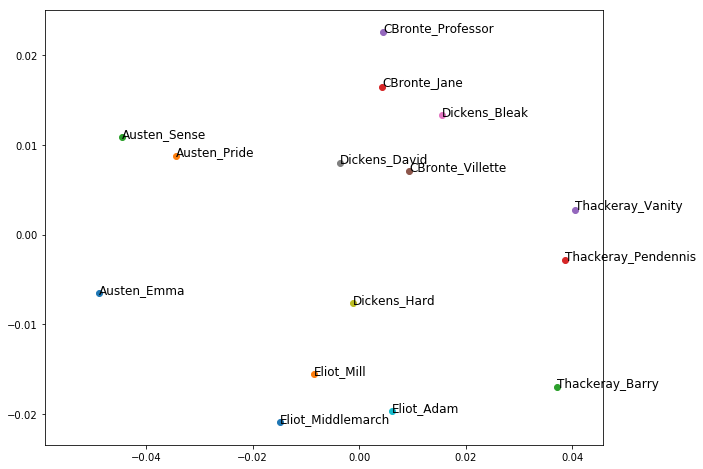

In [120]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

## Multidimensional Scaling (MDS)
## 2-Dim
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=5)
pos = mds.fit_transform(cosdist) # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

plt.figure(figsize=(10,8))
for x, y, name in zip(xs, ys, booknames):
    plt.scatter(x, y)
    plt.text(x, y, name, fontsize=12)
          
plt.show()

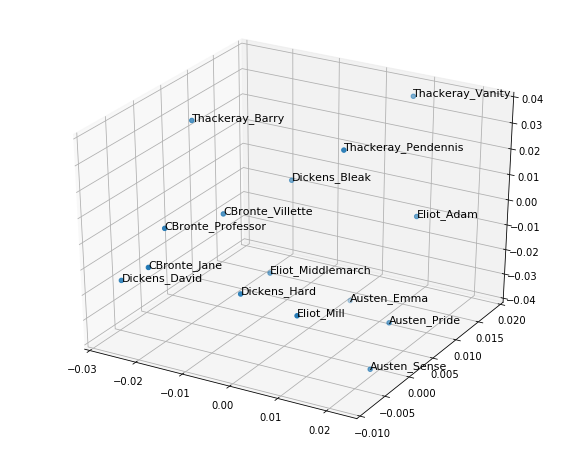

In [122]:
from mpl_toolkits.mplot3d import Axes3D

## 3-Dim
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=5)
pos = mds.fit_transform(cosdist)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], booknames):
    ax.text(x, y, z, s, fontsize=11)
    ax.set_xlim3d(-.03,.025) #stretch out the x axis
    ax.set_ylim3d(-.01,.02) #stretch out the x axis
    ax.set_zlim3d(-.04,.04) #stretch out the z axis
plt.show()

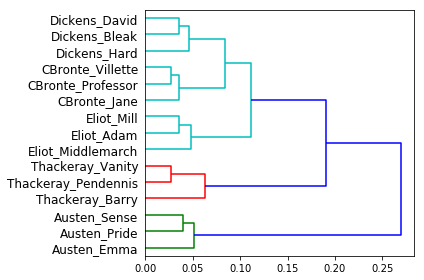

In [123]:
from scipy.cluster.hierarchy import ward, dendrogram

# Ward’s method clustering 
linkage_matrix = ward(cosdist) 
dendrogram(linkage_matrix, orientation="right", labels=booknames)
plt.tight_layout()
plt.show()